In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
from torchviz import make_dot

In [2]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [3]:
x = sampleData1[:,0]
y = sampleData1[:,1]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20307 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_

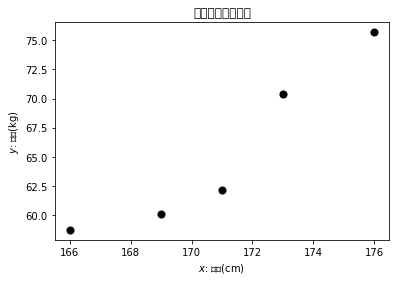

In [4]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 身長(cm)')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.show()

In [5]:
X = x - x.mean()
Y = y - y.mean()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24460 missing from current font.
  font.set_text

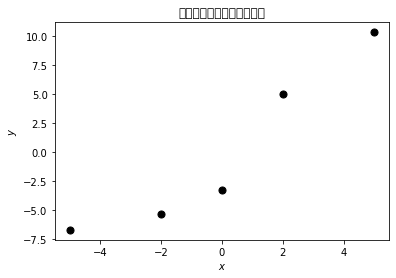

In [6]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('加工後の身長と体重の関係')
plt.show()

In [7]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [8]:
print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [9]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [10]:
def pred(X):
    return W * X + B

In [11]:
Yp = pred(X)

In [12]:
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


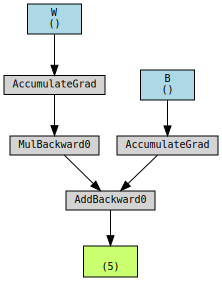

In [13]:
#予測値の計算グラフ

params = {'W': W, 'B' : B}
g = make_dot(Yp, params=params)
display(g)

In [14]:
#平均二条誤差

def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

In [15]:
loss = mse(Yp, Y)

In [16]:
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


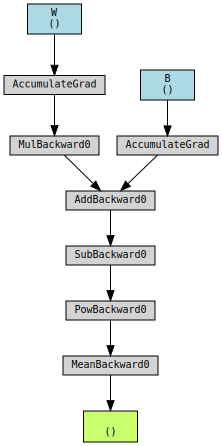

In [17]:
# 損失の計算グラフ

params = {'W': W, 'B' : B}
g = make_dot(loss, params=params)
display(g)

In [18]:
#勾配計算

loss.backward()

In [19]:
#勾配値確認

print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [20]:
lr = 0.001

In [21]:
with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    
    W.grad.zero_()
    B.grad.zero_()

In [22]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


In [23]:
#初期化

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

In [24]:
#ループ処理

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad
        
        W.grad.zero_()
        B.grad.zero_()
        
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [25]:
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

print(f'初期状態：損失：{history[0,1]:.4f}')
print(f'最終状態：損失：{history[-1,1]:.4f}')

W =  1.820683
B =  0.3675114
初期状態：損失：13.3520
最終状態：損失：4.6796


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_

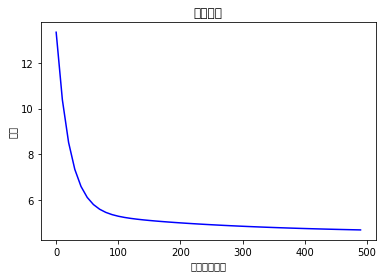

In [26]:
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線')
plt.show()

NameError: name 'X_range' is not defined

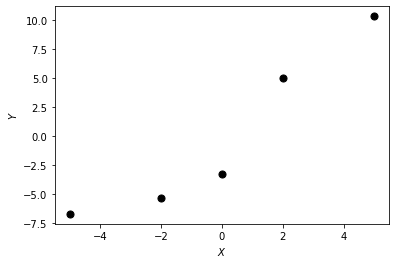

In [27]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.show()

In [29]:
#初期化

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

history = np.zeros((0, 2))

In [30]:
#ループ処理

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad
        
        W.grad.zero_()
        B.grad.zero_()
        
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [33]:
# パラメータの最終値
print(' W = ', W.data.numpy())
print(' B = ', B.data.numpy())

# 損失の確認
print(f'初期状態：　損失：{history[0, 1]:.4f}')
print(f'最終状態：　損失：{history[-1,1]:.4f}')

 W =  1.820683
 B =  0.3675114
初期状態：　損失：13.3520
最終状態：　損失：4.6796


In [34]:
with torch.no_grad():
    # パラメータ修正
    W -= lr * W.grad
    B -= lr * B.grad

In [35]:
# 初期化

# WとBを変数として扱う
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 繰り返し回数
num_epochs = 500

# 学習率
lr = 0.001

# optimizer として SGD を指定する
import torch.optim as optim
optimizer = optim.SGD([W, B], lr = lr, momentum=0.9)

# 記録用配列初期化
history2 = np.zeros((0, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25613 missing from current font.
  font.set_

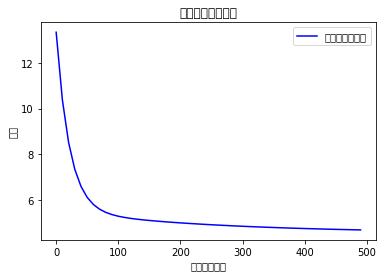

In [38]:
# 学習曲線の表示

plt.plot(history[:,0], history[:,1], 'b', label = 'デフォルト設定')
plt.xlabel("繰り返し回数")
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線（損失）')
plt.show()